# BANK EDA

## Step 1: Problem statement and data collection

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
total_data = pd.read_csv("/workspaces/machine-learning-logistic-regression/data/raw/bank-marketing-campaign-data.csv", sep = ";")

## Step 2: Exploration and data cleaning

In [42]:
total_data.shape

(41188, 21)

In [43]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

-There are a total of 41.188 rows (in this case, bank data) and 21 columns, among which we find the target or class to predict, Y

-The variables always have a value.

-The data has 10 numerical characteristics and 11 categorical characteristics.

### Eliminate duplicates

In [44]:
duplicates_count = total_data.duplicated().sum()
duplicates_count

12

In [45]:
total_data.drop_duplicates(inplace = True)

In [46]:
total_data.shape

(41176, 21)

In [47]:
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [48]:
#Converting unknown and nonexistent into nulls.
total_data.replace(["unknown", "nonexistent"], np.nan, inplace=True)
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [50]:
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


### Eliminate irrelevant information

In [51]:
total_data.drop(["contact", "month", "day_of_week", "pdays", "previous", "nr.employed", "poutcome"], axis = 1, inplace = True)

## Step 3: Analysis of univariate variables

### Analysis on categorical variables

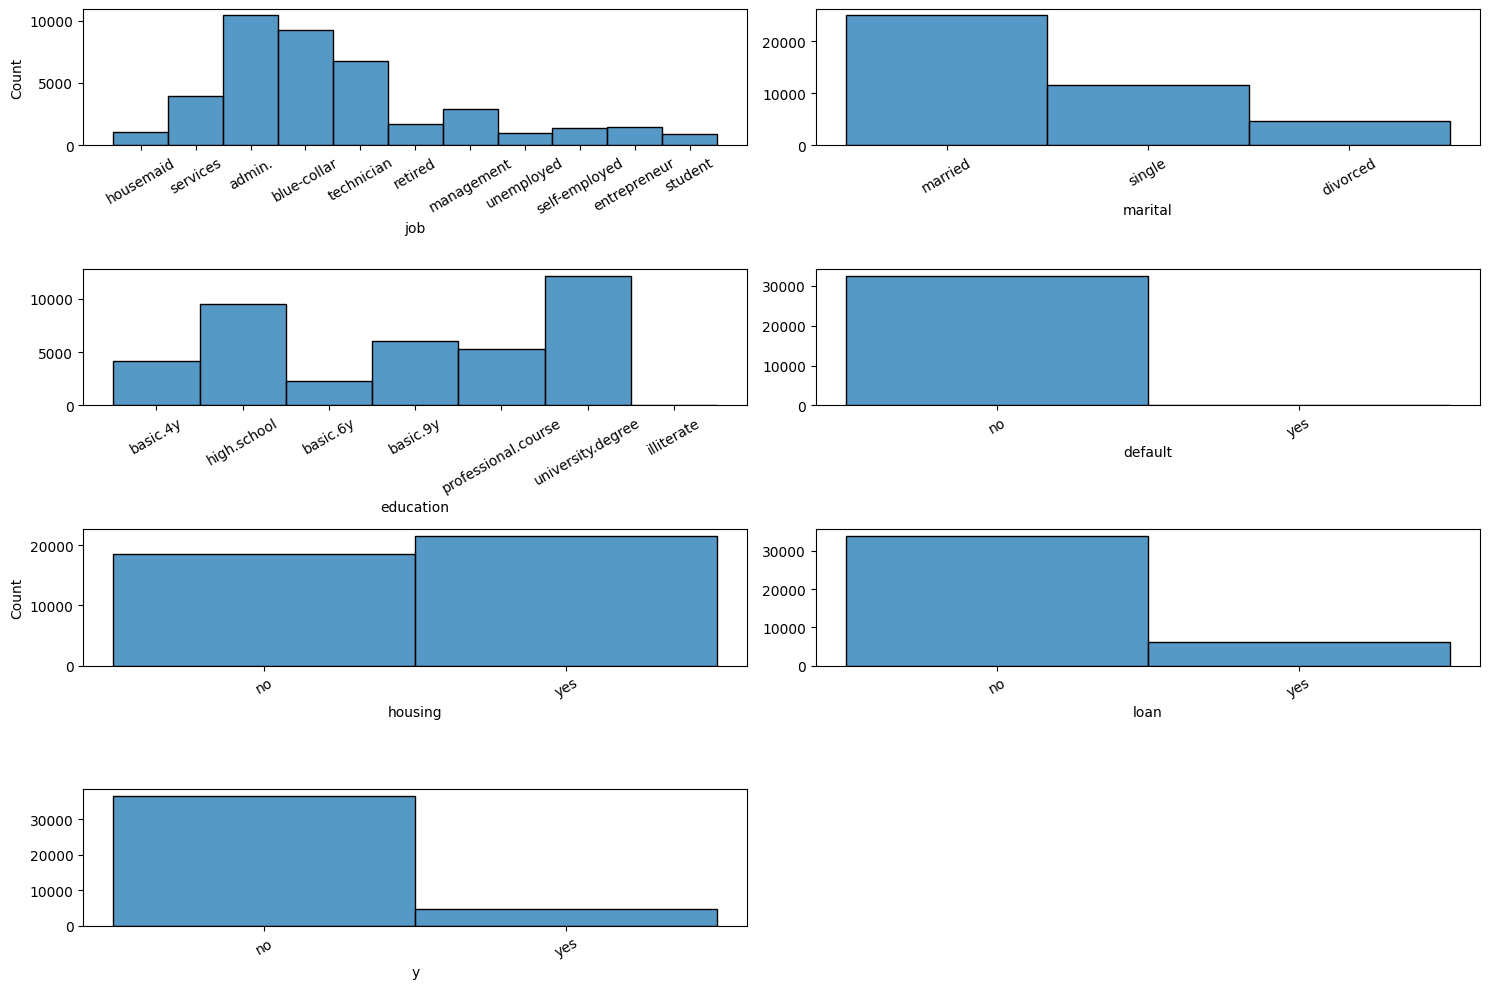

In [52]:
fig, axis = plt.subplots(4, 2, figsize= (15, 10))
	
# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = total_data, x = "job")
sns.histplot(ax = axis[0, 1], data = total_data, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = total_data, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2, 0], data = total_data, x = "housing")
sns.histplot(ax = axis[2, 1], data = total_data, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = total_data, x = "y").set(ylabel = None)

for ax in axis.flat:
    ax.tick_params(axis='x', labelrotation=30)

plt.delaxes(ax = axis[3, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

With these graphics, we can understand our variables a bit:

1) Job: The most common job is admin, followed by blue-collar.
2) Marital: The majority of individuals are married, with a difference of approximately 10,000 compared to singles.
3) Education: Most people have a university degree or high school diploma, while a small portion are illiterate.
4) Default: The majority of people do not have credit.
5) Housing: The majority have a housing loan, with a difference of approximately 3,000 individuals compared to those who don't.
6) Loan: The majority do not have a personal loan, with a difference of approximately 25,000 individuals compared to those who don't.
7) Y: The majority of individuals do not opt for a long-term deposit.

### Analysis on numeric variables

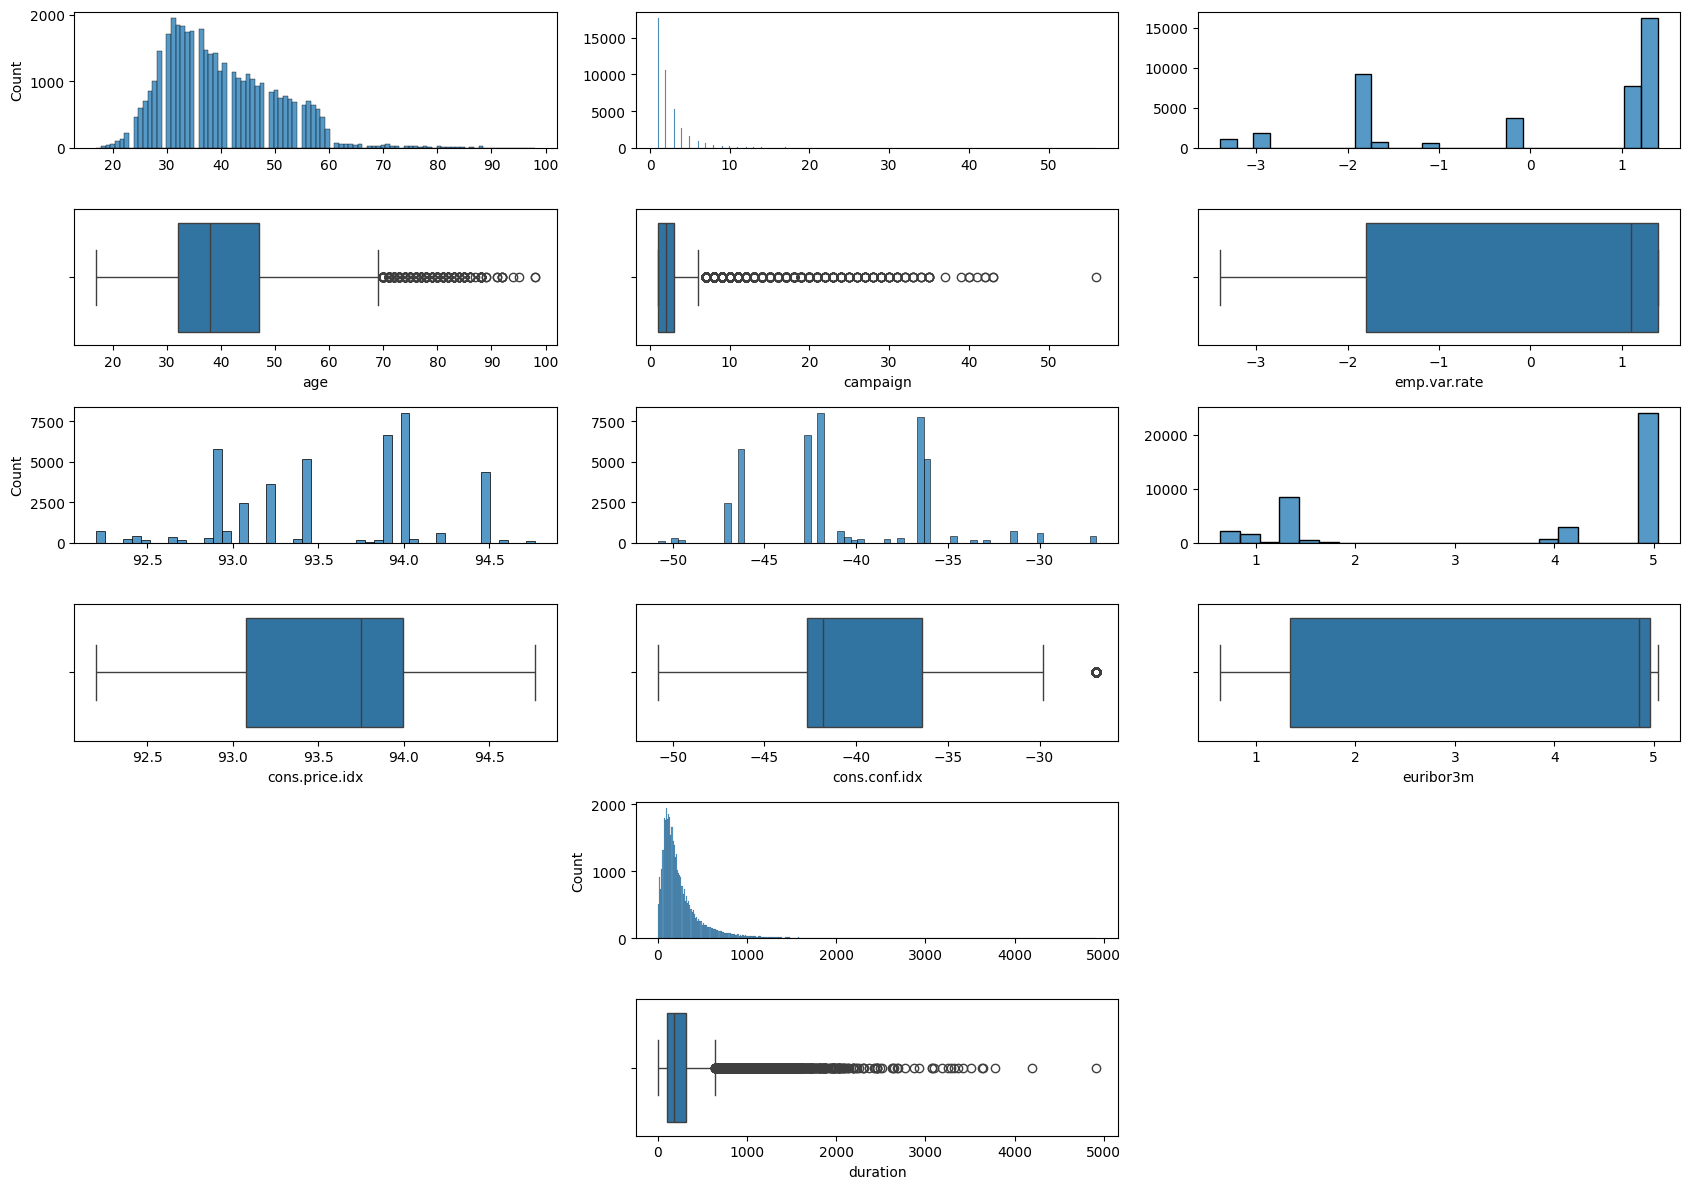

In [53]:
fig, axis = plt.subplots(6, 3, figsize= (17, 12))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "campaign")
sns.histplot(ax = axis[0, 2], data = total_data, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "emp.var.rate")
sns.histplot(ax = axis[2, 0], data = total_data, x = "cons.price.idx").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "cons.price.idx")
sns.histplot(ax = axis[2, 1], data = total_data, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "cons.conf.idx")
sns.histplot(ax = axis[2, 2], data = total_data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "euribor3m")
sns.histplot(ax = axis[4, 1], data = total_data, x = "duration").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = total_data, x = "duration")

#Delete axis
plt.delaxes(ax = axis[4, 0])
plt.delaxes(ax = axis[5, 0])
plt.delaxes(ax = axis[4, 2])
plt.delaxes(ax = axis[5, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In these graphs, we can observe:

1) Age: We observe a left-skewed distribution where the mode is to the left of the mean. Notably, outliers are approximately between 70 and 100 years old.
2) Campaign: Similarly, we observe a left-skewed distribution, and we will further analyze the outliers.
3) Emp.var.rate: In this graph, we notice that the employment variation rate has a mode equal to or near the third quartile.
4) Cons.price.idx: Here, we also notice how the mode of the consumer price index coincides with the third quartile.
5) Cons.conf.idx: In this graph, the mode aligns with the median, which is our second quartile.
6) Euribor3m: Here, we observe the mode lies between the median and the right whisker.
7) Duration: In this graph, we notice a left-skewed distribution where the mode aligns with our first quartile."

## Step 4: Analysis of multivariate variables

### Numerical-numerical analysis

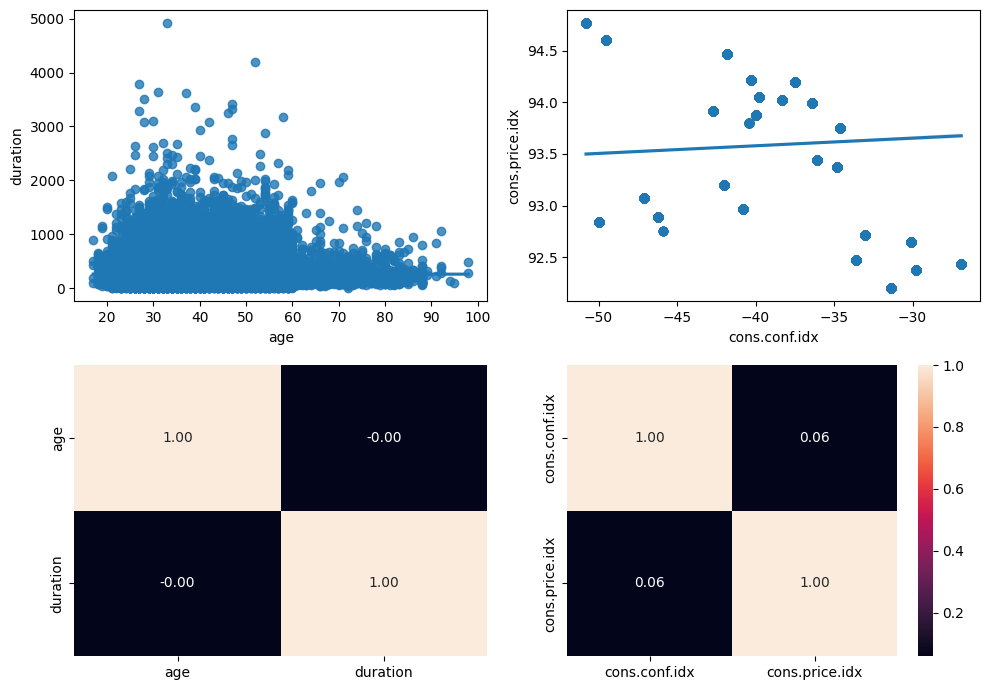

In [54]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "duration")
sns.heatmap(total_data[["age", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "cons.conf.idx", y = "cons.price.idx")
sns.heatmap(total_data[["cons.conf.idx", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In both graphs, we can observe that there is no correlation between the variables: age and duration, as well as cons.conf.idx and cons.price.idx.

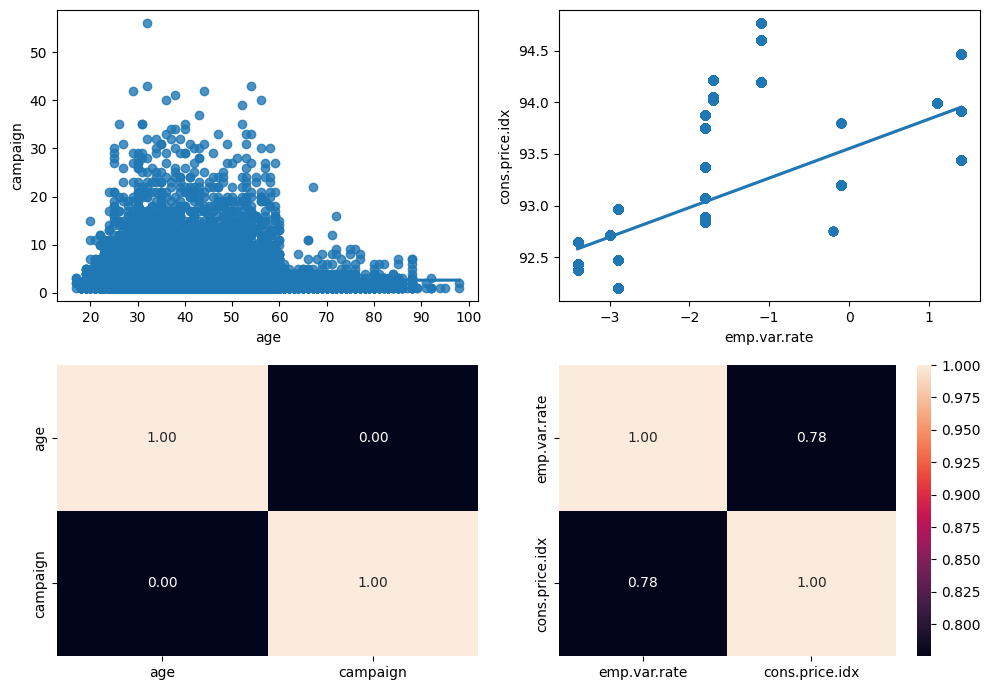

In [55]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "campaign")
sns.heatmap(total_data[["age", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "cons.price.idx")
sns.heatmap(total_data[["emp.var.rate", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we can observe no correlation between age and campaign, whereas in the second graph, a strong correlation is noticeable between the variables emp.var.rate and cons.price.idx.

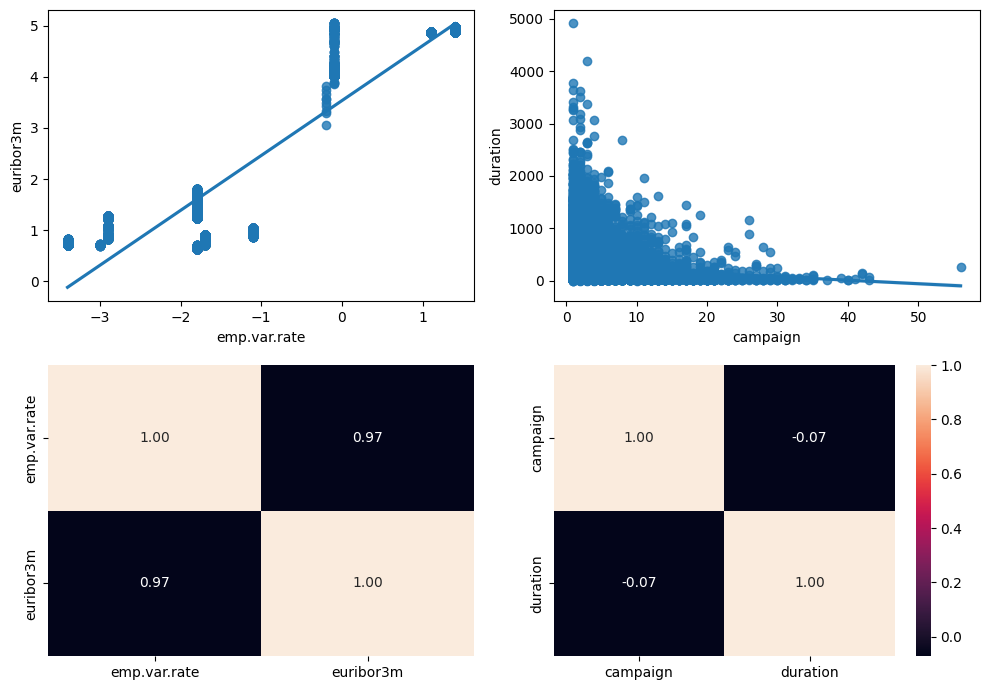

In [56]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "emp.var.rate", y = "euribor3m")
sns.heatmap(total_data[["emp.var.rate", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "campaign", y = "duration")
sns.heatmap(total_data[["campaign", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we observe an even stronger correlation between emp.var.rate and euribor3m. 

In the second graph, we observe no correlation between duration and campaign.

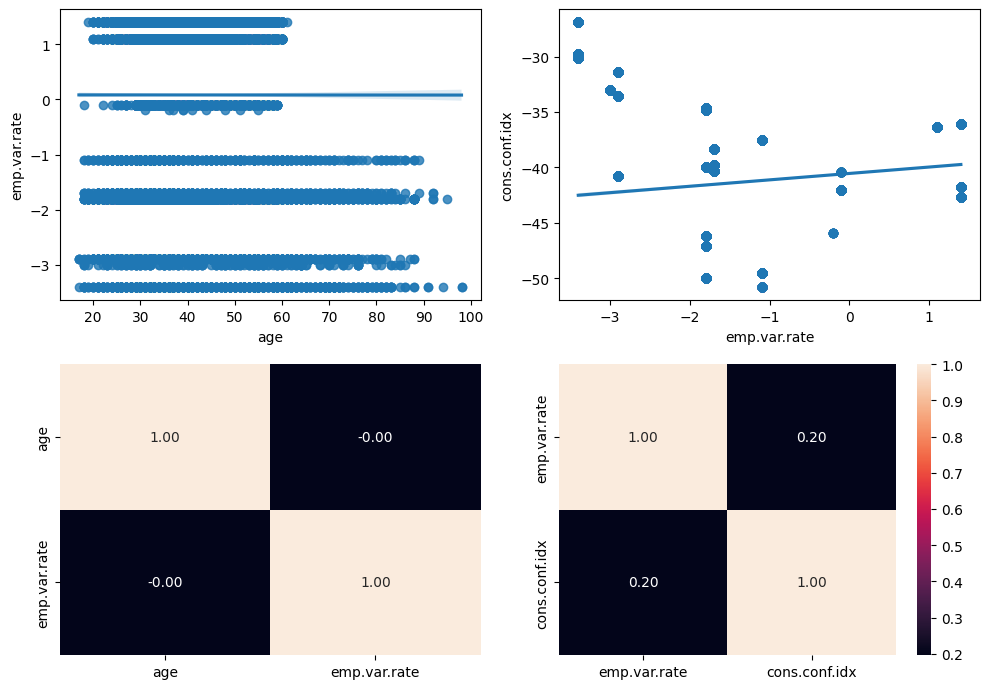

In [57]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "emp.var.rate")
sns.heatmap(total_data[["age", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "cons.conf.idx")
sns.heatmap(total_data[["emp.var.rate", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we observe no correlation between age and emp.var.rate. 

In the second graph, we notice a very low correlation between emp.var.rate.

### Categorical-categorical analysis

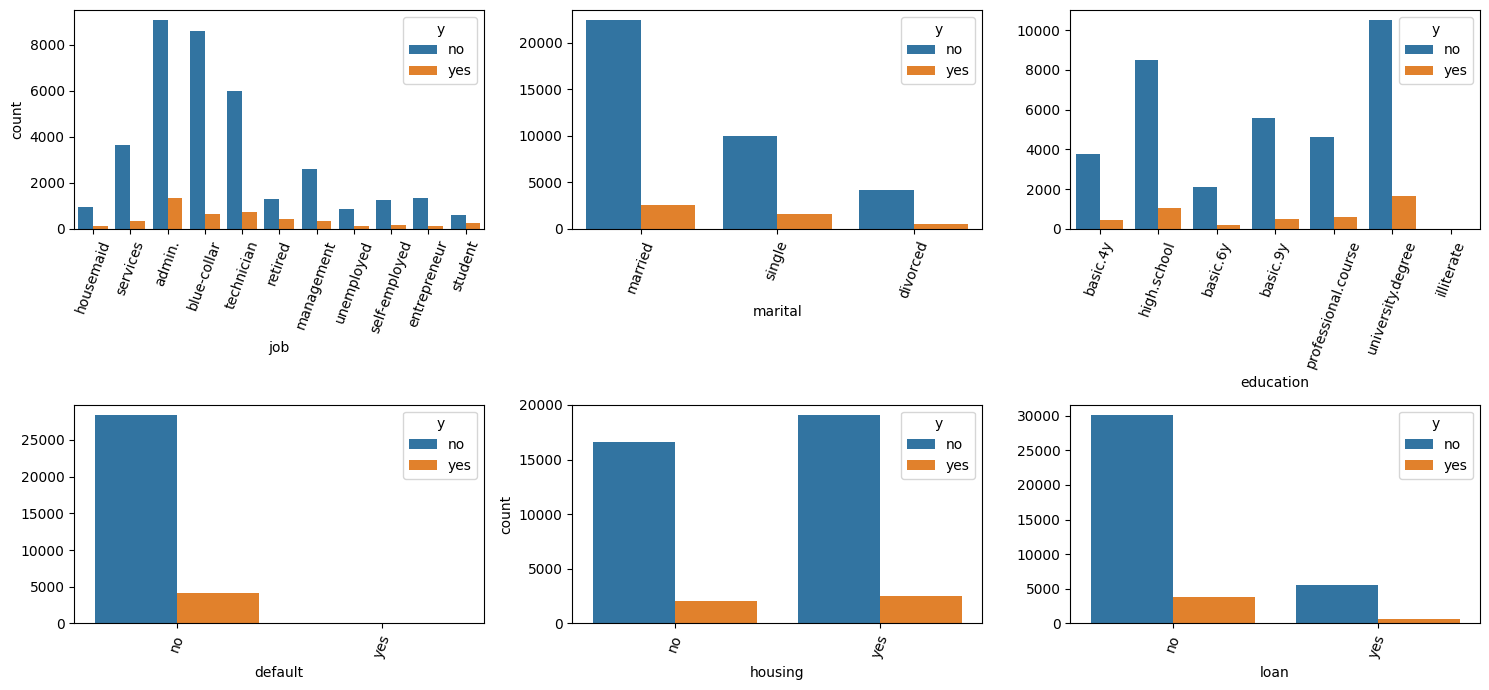

In [58]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = total_data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "default", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = total_data, x = "housing", hue = "y")
sns.countplot(ax = axis[1, 2], data = total_data, x = "loan", hue = "y").set(ylabel = None)


for ax in axis.flat:
    ax.tick_params(axis='x', labelrotation=70)

plt.tight_layout()

plt.show()

From these graphs, it's evident that in most scenarios, the majority wouldn't opt for a long-term deposit. However, noteworthy trends emerge among those who did opt for a long-term deposit:

1) Admins
2) Married
3) University-degrees
4) Those currently without credit
5) Individuals with a housing loan
6) Absence of a personal loan

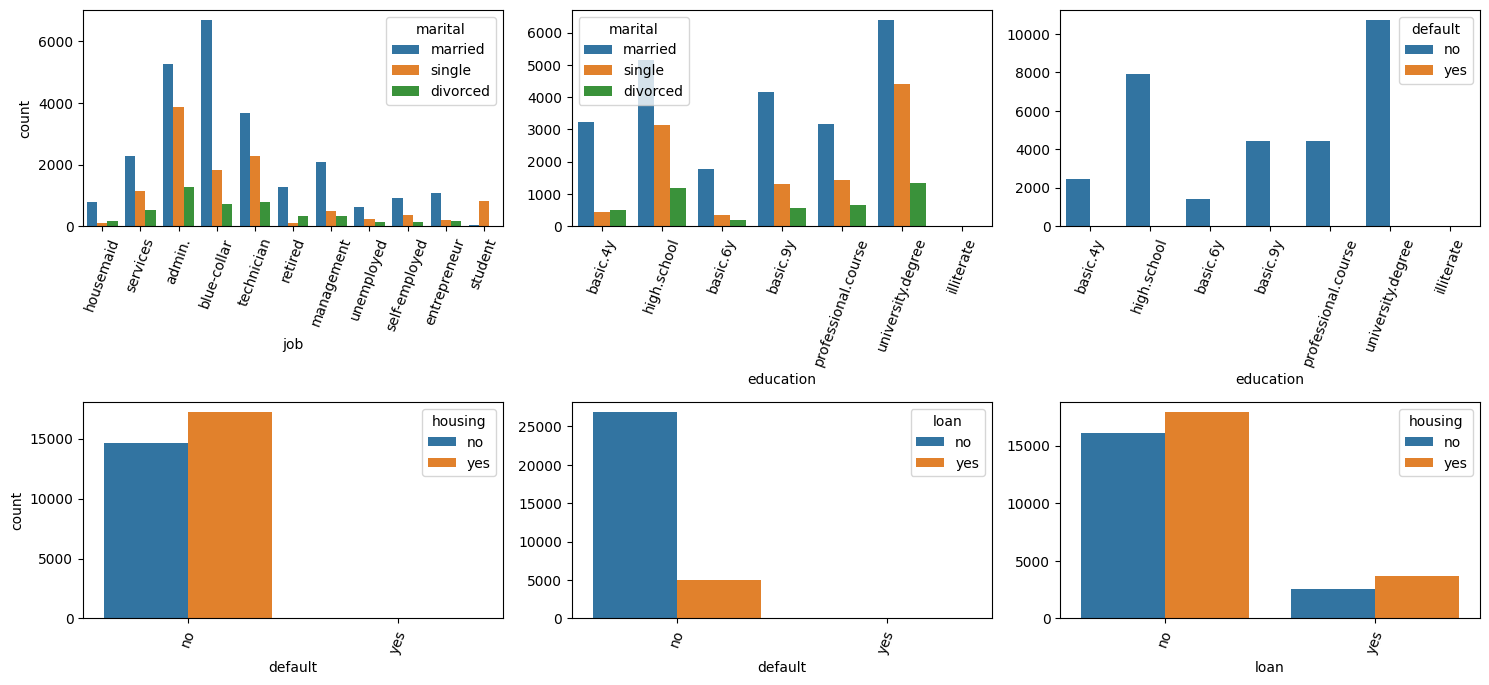

In [59]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "job", hue = "marital")
sns.countplot(ax = axis[0, 1], data = total_data, x = "education", hue = "marital").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = total_data, x = "education", hue = "default").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "default", hue = "housing")
sns.countplot(ax = axis[1, 1], data = total_data, x = "default", hue = "loan").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = total_data, x = "loan", hue = "housing").set(ylabel = None)

for ax in axis.flat:
    ax.tick_params(axis='x', labelrotation=70)

plt.tight_layout()

plt.show()

In these graphs, we can observe:

1) The majority of individuals, except for students, are married.
2) The majority of individuals, education-wise, do not have a credit.
3) The majority of individuals without credit have a housing loan.
4) The majority of individuals without credit also lack a personal loan.
5) The majority of individuals without a personal loan have a housing loan.

### Combinations of class with various predictors.

In [60]:
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]
total_data["y_n"] = pd.factorize(total_data["y"])[0]

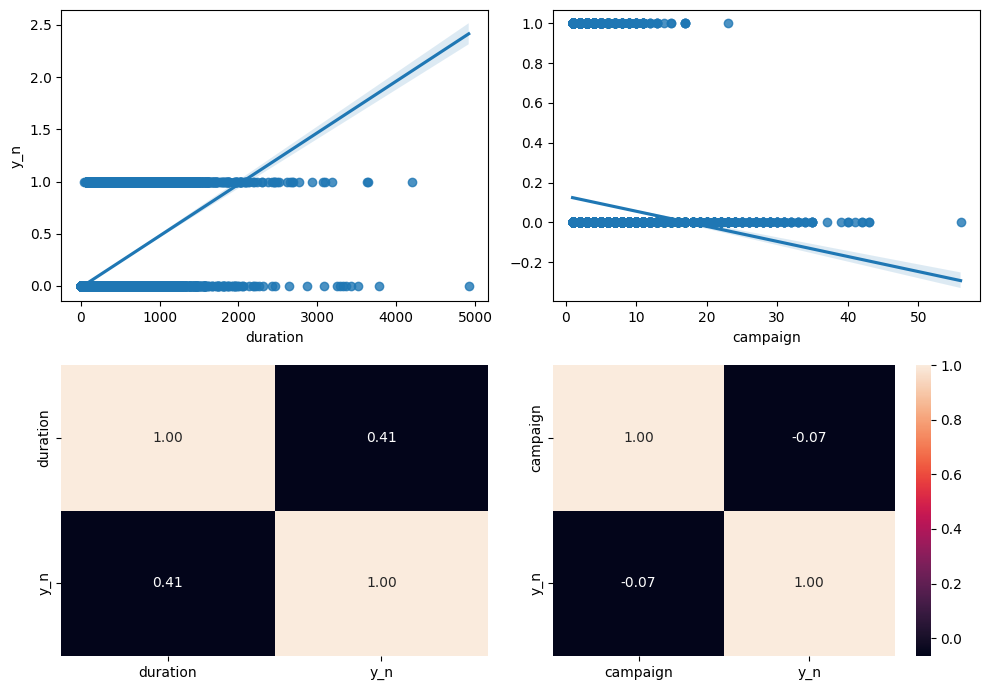

In [61]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "duration", y = "y_n")
sns.heatmap(total_data[["duration", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "campaign", y = "y_n").set(ylabel=None)
sns.heatmap(total_data[["campaign", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we can observe a correlation between the duration and whether the person subscribes to a long-term deposit.

In the second graph, we notice no correlation between the previous campaign and whether the person subscribes to a long-term deposit.

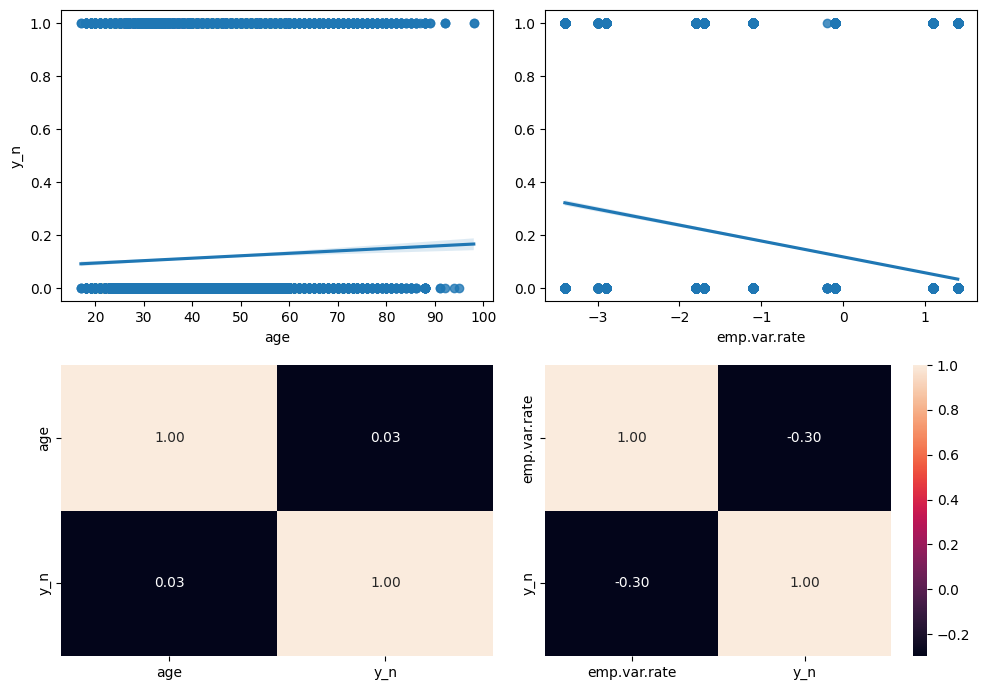

In [62]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "y_n")
sns.heatmap(total_data[["age", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "y_n").set(ylabel=None)
sns.heatmap(total_data[["emp.var.rate", "y_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In the first graph, we can observe there is no correlation between age and whether the person subscribes to a long-term deposit.

In the second graph, we notice a negative correlation between emp.var.rate and whether the person subscribes to a long-term deposit.

## Correlation analysis

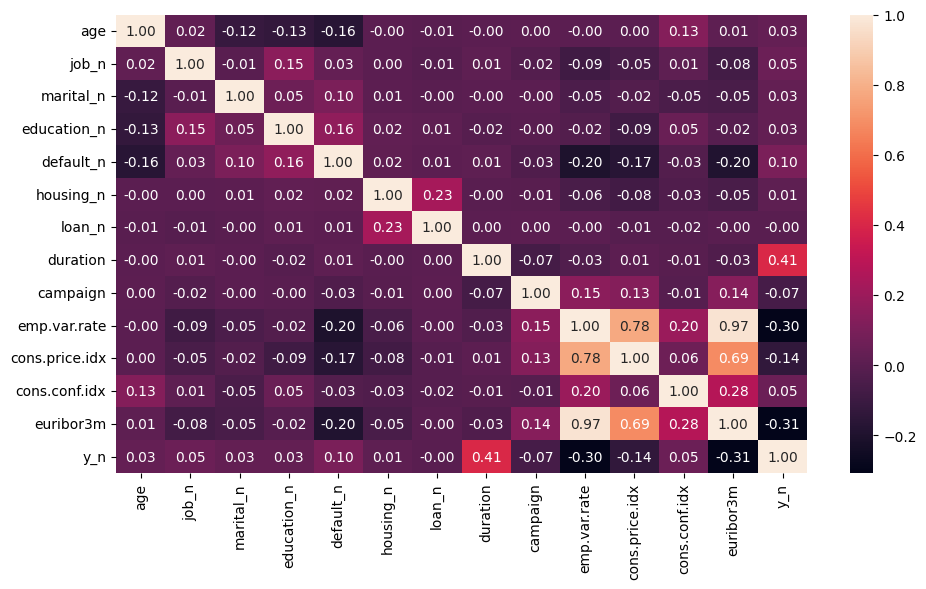

In [63]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["age", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "y_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In this heatmap, we observe values with a positive correlation:

1) euribor3m with emp.var.rate
2) cons.price.idx with emp.var.rate
3) euribor3m with cons.price.idx
4) y with duration

We also notice values with a moderate negative correlation:

1) y with euribor3m
2) y with emp.var.rate

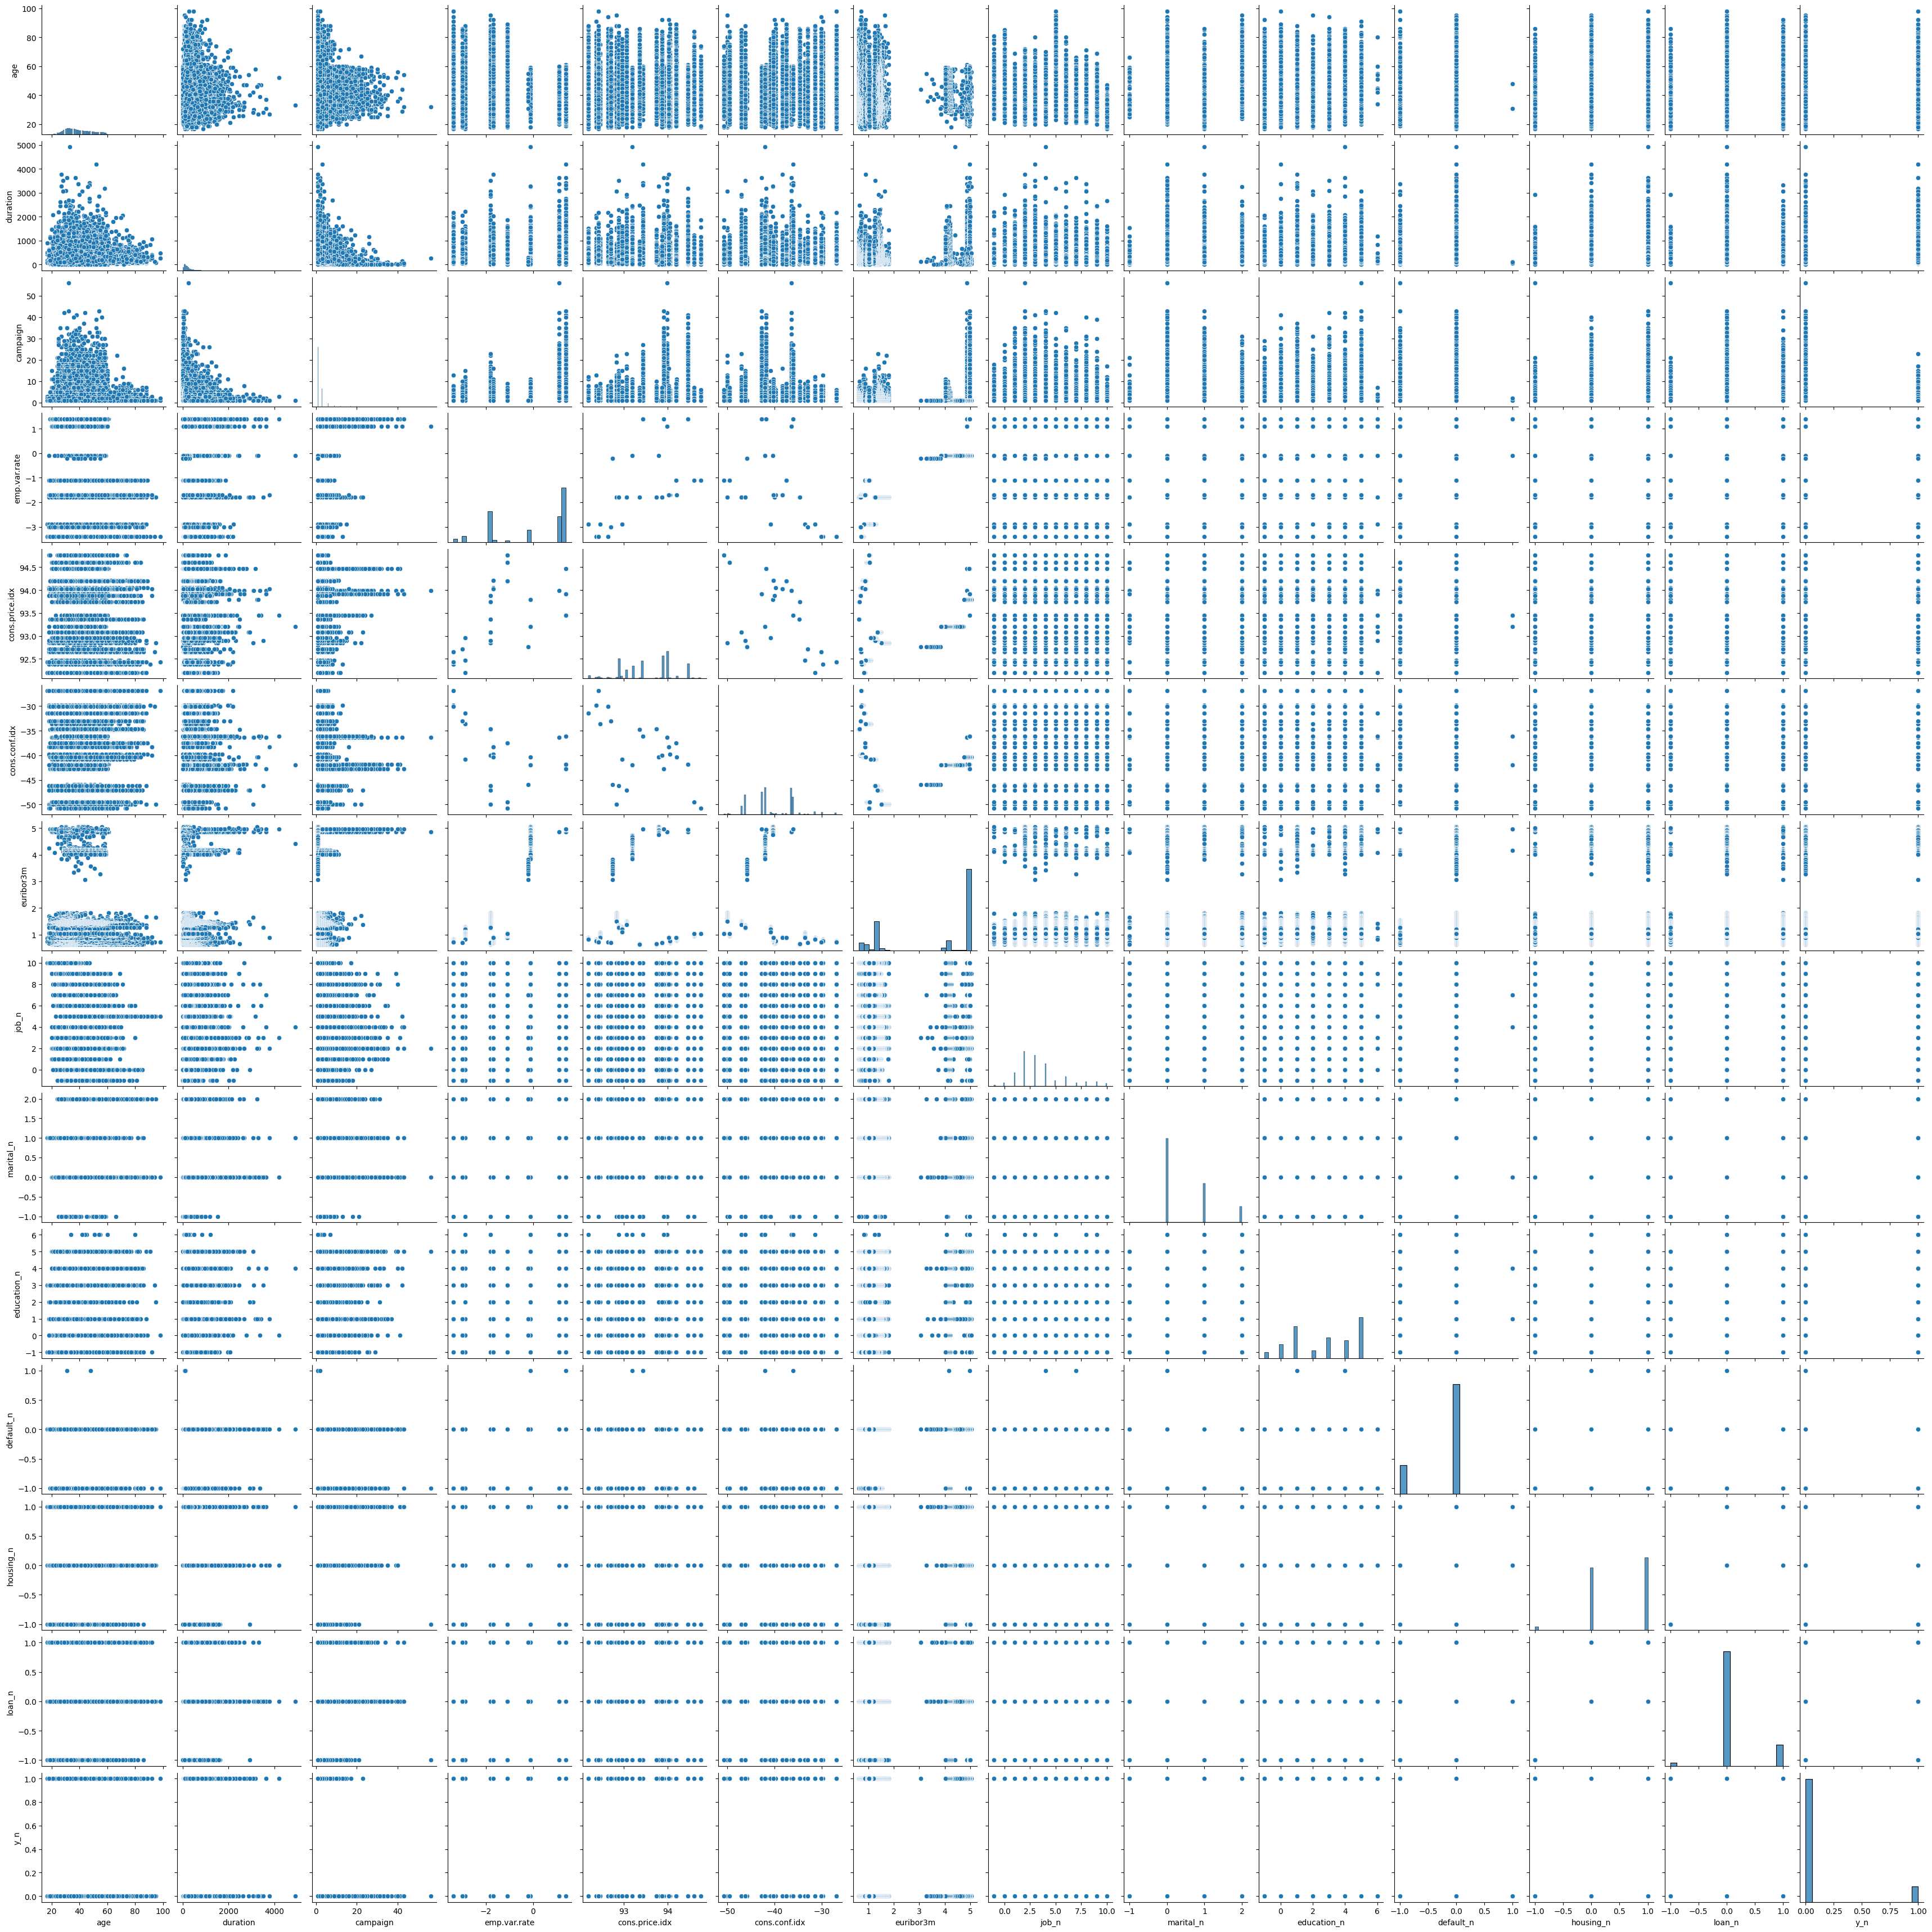

In [64]:
sns.pairplot(data = total_data)

## Step 5: Feature engineering

### Outlier analysis

In [65]:
total_data[["age", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "duration", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "y_n"]].describe()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y_n
count,41176.00000,41176.000000,41176.000000,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.537109,0.502866,2.72943,-0.208690,0.499830,0.127696,258.315815,2.567879,0.081922,93.575720,-40.502863,3.621293,0.112663
std,10.42068,2.291429,0.691270,1.95049,0.406556,0.545979,0.399349,259.305321,2.770318,1.570883,0.578839,4.627860,1.734437,0.316184
min,17.00000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,0.000000
25%,32.00000,2.000000,0.000000,1.00000,0.000000,0.000000,0.000000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,0.000000
50%,38.00000,3.000000,0.000000,3.00000,0.000000,1.000000,0.000000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,0.000000
75%,47.00000,4.000000,1.000000,5.00000,0.000000,1.000000,0.000000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,0.000000
max,98.00000,10.000000,2.000000,6.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,1.000000


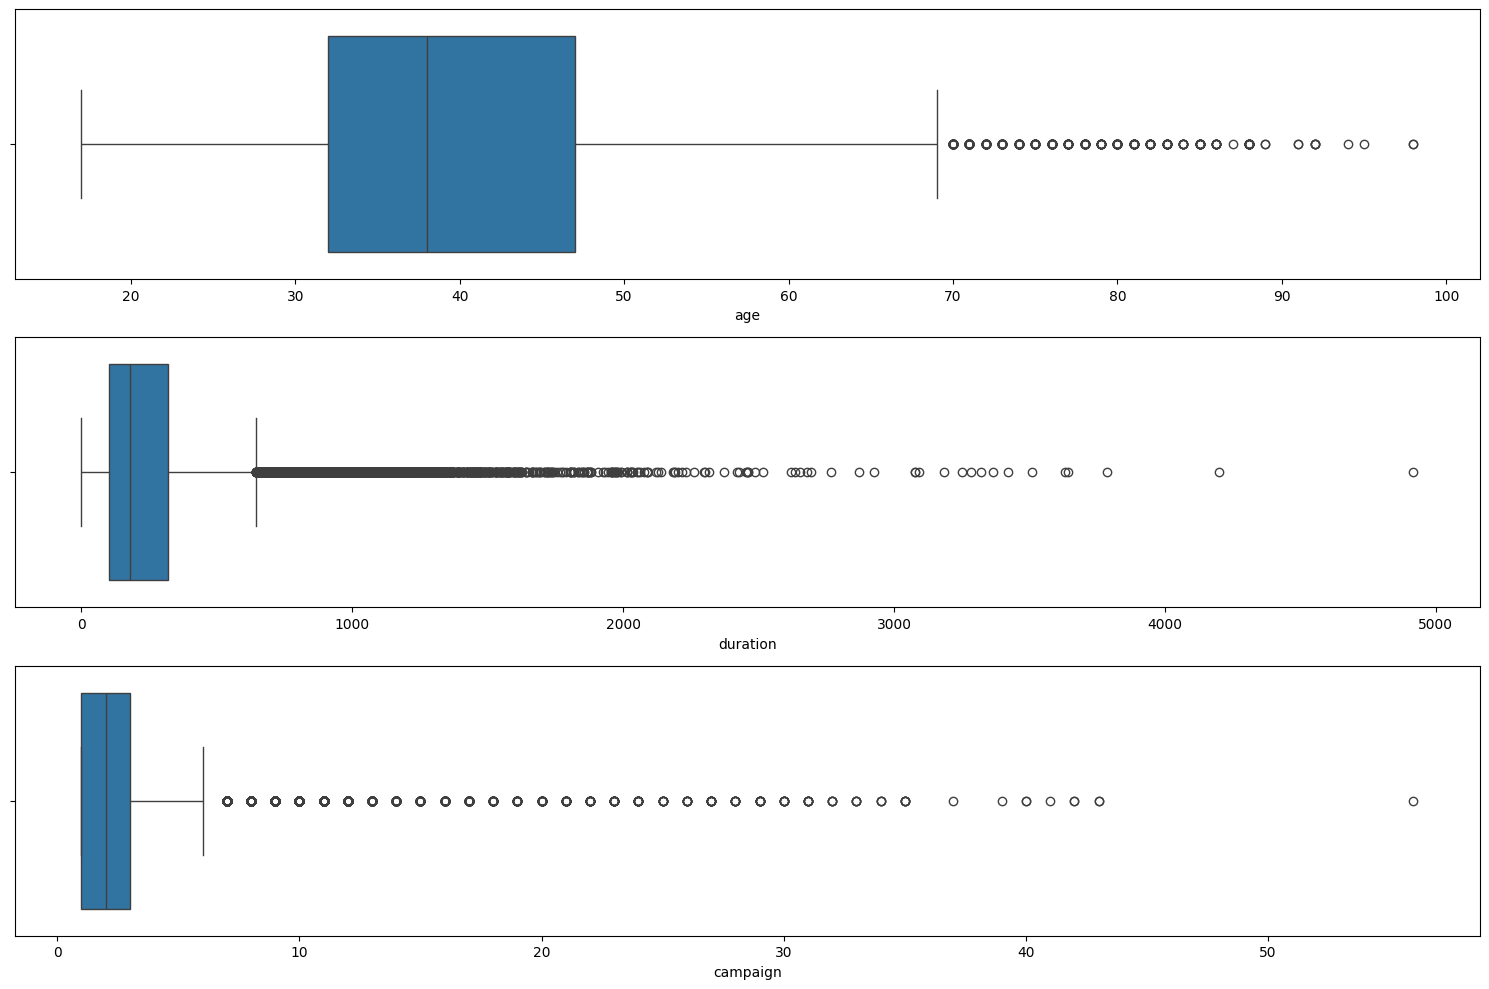

In [66]:
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = total_data, x = "age")
sns.boxplot(ax = axis[1], data = total_data, x = "duration")
sns.boxplot(ax = axis[2], data = total_data, x = "campaign")

plt.tight_layout()

plt.show()

In [67]:
campaign_stats = total_data["campaign"].describe()
campaign_stats

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [68]:
campaign_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_stats["25%"] - 1.5 * campaign_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

The upper and lower limits for finding outliers are 6.0 and -2.0, with an interquartile range of 2.0


In [69]:
total_data[total_data["campaign"] > 20].shape

(157, 21)

In [70]:
total_data.drop(total_data[total_data["campaign"] > 20].index, inplace = True)
total_data

,age,job,marital,education,default,housing,loan,duration,campaign,emp.var.rate,...,cons.conf.idx,euribor3m,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,261,1,1.1,...,-36.4,4.857,no,0,0,0,0,0,0,0
1,57,services,married,high.school,NaN,no,no,149,1,1.1,...,-36.4,4.857,no,1,0,1,-1,0,0,0
2,37,services,married,high.school,no,yes,no,226,1,1.1,...,-36.4,4.857,no,1,0,1,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,151,1,1.1,...,-36.4,4.857,no,2,0,2,0,0,0,0
4,56,services,married,high.school,no,no,yes,307,1,1.1,...,-36.4,4.857,no,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,334,1,-1.1,...,-50.8,1.028,yes,5,0,4,0,1,0,1
41184,46,blue-collar,married,professional.course,no,no,no,383,1,-1.1,...,-50.8,1.028,no,3,0,4,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,189,2,-1.1,...,-50.8,1.028,no,5,0,5,0,1,0,0
41186,44,technician,married,professional.course,no,no,no,442,1,-1.1,...,-50.8,1.028,yes,4,0,4,0,0,0,1


#### Missing value analysis

In [71]:
total_data.isnull().sum().sort_values(ascending=False)

default           8559
education         1724
housing            988
loan               988
job                330
marital             79
age                  0
job_n                0
loan_n               0
housing_n            0
default_n            0
education_n          0
marital_n            0
cons.price.idx       0
y                    0
euribor3m            0
cons.conf.idx        0
emp.var.rate         0
campaign             0
duration             0
y_n                  0
dtype: int64

In [72]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

default           0.208659
education         0.042029
housing           0.024086
loan              0.024086
job               0.008045
marital           0.001926
age               0.000000
job_n             0.000000
loan_n            0.000000
housing_n         0.000000
default_n         0.000000
education_n       0.000000
marital_n         0.000000
cons.price.idx    0.000000
y                 0.000000
euribor3m         0.000000
cons.conf.idx     0.000000
emp.var.rate      0.000000
campaign          0.000000
duration          0.000000
y_n               0.000000
dtype: float64

In [73]:
total_data["default"].fillna(total_data["default"].mode()[0], inplace= True)
total_data["education"].fillna(total_data["education"].mode()[0], inplace= True)
total_data["housing"].fillna(total_data["housing"].mode()[0], inplace= True)
total_data["loan"].fillna(total_data["loan"].mode()[0], inplace= True)
total_data["job"].fillna(total_data["job"].mode()[0], inplace= True)
total_data["marital"].fillna(total_data["marital"].mode()[0], inplace= True)

total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
duration          0
campaign          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
y_n               0
dtype: int64

In [74]:
total_data["job_n"] = pd.factorize(total_data["job"])[0]
total_data["marital_n"] = pd.factorize(total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"])[0]
total_data["default_n"] = pd.factorize(total_data["default"])[0]
total_data["housing_n"] = pd.factorize(total_data["housing"])[0]
total_data["loan_n"] = pd.factorize(total_data["loan"])[0]

### Inference of new features

I'm not making any inferences in this dataset.

### Feature scaling

Divide the dataset

In [75]:
from sklearn.model_selection import train_test_split

num_variables = ['age', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'duration', 'campaign', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m']

# We divide the dataset into training and test samples.
X = total_data.drop("y_n", axis = 1)[num_variables]
y = total_data["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24, stratify= y)

X_train.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
40118,32,1,0,2,0,1,1,35,1,-1.7,94.215,-40.3,0.835
23311,47,2,2,5,0,0,1,69,6,1.4,93.444,-36.1,4.964
13241,28,3,1,4,0,1,0,611,2,1.4,93.918,-42.7,4.962
38315,35,2,0,5,0,1,0,126,2,-3.4,92.431,-26.9,0.740
36477,59,5,0,4,0,1,0,68,1,-2.9,92.963,-40.8,1.260


Normalization, Min-Max Scaling or ...

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)

scal_features_train = scaler.transform(X_train)
scal_features_test = scaler.transform(X_test)

X_train_scal = pd.DataFrame(scal_features_train, index = X_train.index, columns = num_variables)
X_test_scal = pd.DataFrame(scal_features_test, index = X_test.index, columns = num_variables)


X_train_scal.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
40118,0.185185,0.1,0.0,0.333333,0.0,1.0,1.0,0.008335,0.000000,0.354167,0.784879,0.439331,0.045568
23311,0.370370,0.2,1.0,0.833333,0.0,0.0,1.0,0.016432,0.263158,1.000000,0.484412,0.615063,0.981637
13241,0.135802,0.3,0.5,0.666667,0.0,1.0,0.0,0.145511,0.052632,1.000000,0.669135,0.338912,0.981183
38315,0.222222,0.2,0.0,0.833333,0.0,1.0,0.0,0.030007,0.052632,0.000000,0.089634,1.000000,0.024031
36477,0.518519,0.5,0.0,0.666667,0.0,1.0,0.0,0.016194,0.000000,0.104167,0.296960,0.418410,0.141918


## Step 6: Feature selection

In [77]:
from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 5 we implicitly mean that we want to remove 2 features from the dataset
selection_model = SelectKBest(f_classif, k = 9)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)

X_train_sel.head()

,age,job_n,education_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0.185185,0.1,0.333333,0.008335,0.000000,0.354167,0.784879,0.439331,0.045568,0
1,0.370370,0.2,0.833333,0.016432,0.263158,1.000000,0.484412,0.615063,0.981637,0
2,0.135802,0.3,0.666667,0.145511,0.052632,1.000000,0.669135,0.338912,0.981183,0
3,0.222222,0.2,0.833333,0.030007,0.052632,0.000000,0.089634,1.000000,0.024031,0
4,0.518519,0.5,0.666667,0.016194,0.000000,0.104167,0.296960,0.418410,0.141918,0


In [78]:
X_test_sel.head()

,age,job_n,education_n,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,0.222222,0.2,0.833333,0.084068,0.157895,0.9375,0.698753,0.602510,0.957833,0
1,0.518519,0.9,0.500000,0.102167,0.473684,0.9375,0.698753,0.602510,0.957379,0
2,0.234568,0.8,0.333333,0.042867,0.052632,0.9375,0.698753,0.602510,0.956926,0
3,0.358025,0.6,0.833333,0.357942,0.052632,0.6875,0.389322,0.368201,0.780322,1
4,0.197531,0.3,0.166667,0.108835,0.105263,1.0000,0.669135,0.338912,0.981183,0


In [79]:
X_train_sel.to_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-logistic-regression/data/processed/bank_test.csv", index=False)

#### END OF EDA